In [1]:
!pip install librosa
!pip install playsound

In [2]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
%matplotlib inline

In [3]:
import librosa
import librosa.display
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
metadata = pd.read_csv('/content/drive/My Drive/Major/Dataset/celeb.csv')

In [6]:
metadata.head(10)

,slice_file_name,fsID,start,end,salience,folder,classID,class
0,co1.wav,co1,0,5,1,1,1,Chiranjeevi_original
1,co2.wav,co2,0,5,1,1,1,Chiranjeevi_original
2,co3.wav,co3,0,5,1,1,1,Chiranjeevi_original
3,co4.wav,co4,0,5,1,1,1,Chiranjeevi_original
4,co5.wav,co5,0,5,1,1,1,Chiranjeevi_original
5,co6.wav,co6,0,5,1,1,1,Chiranjeevi_original
6,co7.wav,co7,0,5,1,1,1,Chiranjeevi_original
7,co8.wav,co8,0,5,1,1,1,Chiranjeevi_original
8,co9.wav,co9,0,5,1,1,1,Chiranjeevi_original
9,co10.wav,c10,0,5,1,1,1,Chiranjeevi_original


In [7]:
metadata['class'].value_counts()

ntr_original            40
Chiranjeevi_original    40
Chiranjeevi_spoof       30
ntr_spoof               30
Name: class, dtype: int64

In [8]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_best') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [9]:
import numpy as np
def manipulate(data, noise_factor):
    noise = np.random.randn(len(data))
    augmented_data = data + noise_factor * noise
    #Cast back to same data type
    augmented_data = augmented_data.astype(type(data[0]))
    return augmented_data

def manipulate1(data, speed_factor):
    return librosa.effects.time_stretch(data, speed_factor)    

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
import numpy as np
from tqdm import tqdm
import math 
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = "/content/drive/My Drive/Major/Dataset/" + str(row["folder"])+"/"+str(row["slice_file_name"])
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])
    
    ###Data Augmentation 1

    librosa_audio_data,librosa_sample_rate=librosa.load(file_name)
    aug_data = manipulate(librosa_audio_data, 1.5)
    data1=features_extractor(aug_data)
    extracted_features.append([data1,final_class_labels])


    ###Data Augmentation 2

    #librosa_audio_data,librosa_sample_rate=librosa.load(file_name)
    aug_data1 = manipulate(librosa_audio_data,0.5)
    data1=features_extractor(aug_data1)
    extracted_features.append([data1,final_class_labels])

140it [04:51,  2.08s/it]


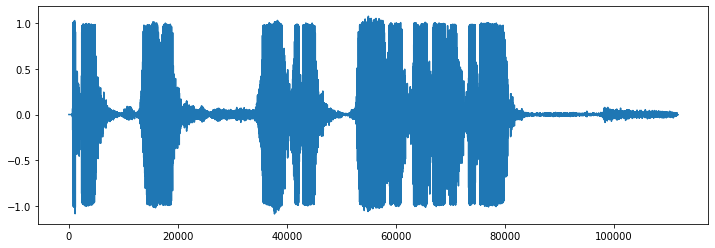

In [12]:
librosa_audio_data,librosa_sample_rate=librosa.load(file_name)
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

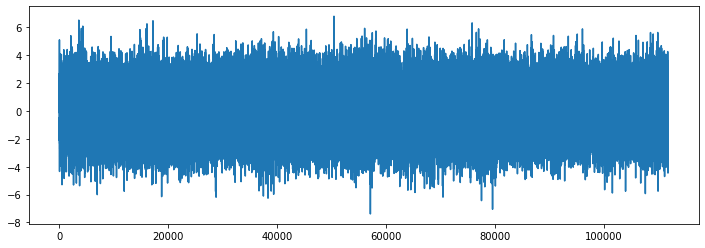

In [13]:
plt.figure(figsize=(12, 4))
plt.plot(aug_data)

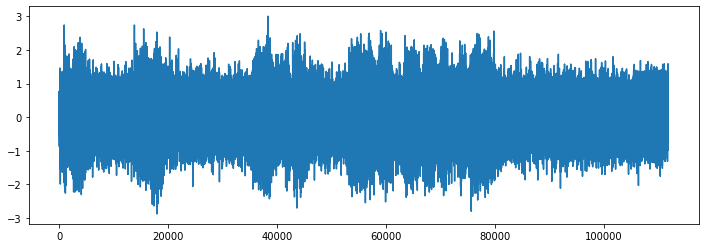

In [14]:
plt.figure(figsize=(12, 4))
plt.plot(aug_data1)

In [15]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-268.76205, 118.80415, 8.758681, -0.39495918,...",Chiranjeevi_original
1,"[-268.76205, 118.80415, 8.758681, -0.39495918,...",Chiranjeevi_original
2,"[-268.76205, 118.80415, 8.758681, -0.39495918,...",Chiranjeevi_original
3,"[-276.53424, 122.71467, 3.4308548, -5.6095138,...",Chiranjeevi_original
4,"[-276.53424, 122.71467, 3.4308548, -5.6095138,...",Chiranjeevi_original


In [16]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [17]:

X.shape

(420, 40)

In [18]:
y.shape

(420,)

In [19]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [21]:
X_train

array([[-276.53424   ,  122.71467   ,    3.4308548 , ...,   -2.2200298 ,
          -3.2795794 ,   -1.1516676 ],
       [-256.01688   ,  128.6255    ,   18.352283  , ...,    1.4900031 ,
           0.75887096,    2.7077346 ],
       [-275.41174   ,  123.05602   ,   19.037144  , ...,   -0.7758432 ,
          -1.9636346 ,   -0.81523985],
       ...,
       [-251.64009   ,  120.065254  ,   24.874884  , ...,    5.0693135 ,
          -1.0129012 ,    3.5704122 ],
       [-158.93507   ,  108.567825  ,   -1.3904686 , ...,   -0.46923047,
          -1.629558  ,   -0.524656  ],
       [-182.69072   ,  135.19437   ,   -4.989288  , ...,    2.0372372 ,
           2.5435653 ,    3.608035  ]], dtype=float32)

In [22]:
X_train.shape

(336, 40)

In [23]:
X_test.shape

(84, 40)

In [24]:

y_train.shape

(336, 4)

In [25]:
y_test.shape

(84, 4)

In [26]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [28]:
num_labels=y.shape[1]

In [29]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))



###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2

In [31]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [32]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 50
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',
                               verbose=1, save_best_only=True)
start = datetime.now()

history = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, 
                    validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/50
11/11 [==============================] - 1s 30ms/step - loss: 36.8676 - accuracy: 0.2411 - val_loss: 6.1578 - val_accuracy: 0.2381

Epoch 00001: val_loss improved from inf to 6.15779, saving model to saved_models/audio_classification.hdf5
Epoch 2/50
11/11 [==============================] - 0s 5ms/step - loss: 24.5923 - accuracy: 0.2679 - val_loss: 3.0777 - val_accuracy: 0.2857

Epoch 00002: val_loss improved from 6.15779 to 3.07772, saving model to saved_models/audio_classification.hdf5
Epoch 3/50
11/11 [==============================] - 0s 4ms/step - loss: 18.1556 - accuracy: 0.2440 - val_loss: 1.5935 - val_accuracy: 0.3690

Epoch 00003: val_loss improved from 3.07772 to 1.59351, saving model to saved_models/audio_classification.hdf5
Epoch 4/50
11/11 [==============================] - 0s 5ms/step - loss: 11.7251 - accuracy: 0.3244 - val_loss: 1.3339 - val_accuracy: 0.6071

Epoch 00004: val_loss improved from 1.59351 to 1.33387, saving model to saved_models/audio_classificat

In [33]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.976190447807312


In [34]:
y_predict = model.predict_classes(X_test)

In [51]:
print(y_predict)

[2 2 0 1 2 3 0 0 3 1 1 2 1 0 2 3 2 3 2 1 0 0 1 1 2 3 1 2 2 3 3 0 1 2 2 2 0
 1 2 3 0 1 1 2 2 2 2 3 0 2 1 2 0 2 2 2 0 0 1 1 0 1 1 0 3 3 3 0 2 3 3 2 0 0
 0 0 3 0 0 3 1 0 0 3]


In [35]:
filename="/content/drive/My Drive/Major/Dataset/test1.mp3"
audio, sample_rate = librosa.load(filename, res_type='kaiser_best') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

#print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
#print(mfccs_scaled_features)
#print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
print(prediction_class)

[1]
['Chiranjeevi_spoof']


In [36]:
import IPython.display as ipd

ipd.Audio(filename)

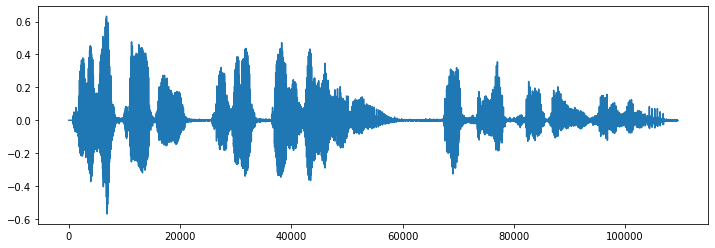

In [37]:
plt.figure(figsize=(12, 4))
plt.plot(audio)

In [38]:
print(y_predict)

[2 2 0 1 2 3 0 0 3 1 1 2 1 0 2 3 2 3 2 1 0 0 1 1 2 3 1 2 2 3 3 0 1 2 2 2 0
 1 2 3 0 1 1 2 2 2 2 3 0 2 1 2 0 2 2 2 0 0 1 1 0 1 1 0 3 3 3 0 2 3 3 2 0 0
 0 0 3 0 0 3 1 0 0 3]


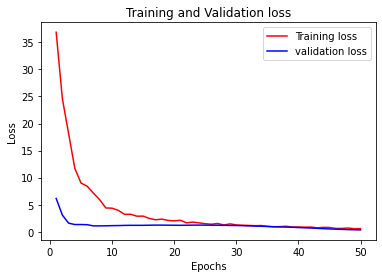

In [39]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1, 51)
plt.plot(epochs, loss_train, 'r', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

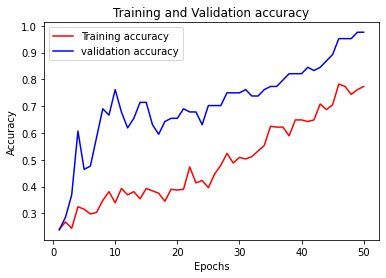

In [52]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'r', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()